In [27]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
set_matplotlib_formats('svg')

# Elbow curve for determining optimal number of clusters

In [32]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=3, centers=2)

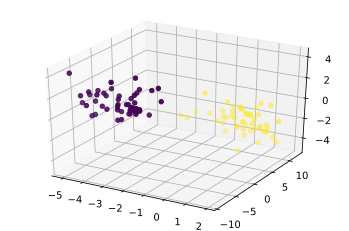

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y);

In [34]:
from sklearn.cluster import KMeans

n_clusters, inertias = zip(*[(k, KMeans(n_clusters=k).fit(X).inertia_) for k in range(1,10)])

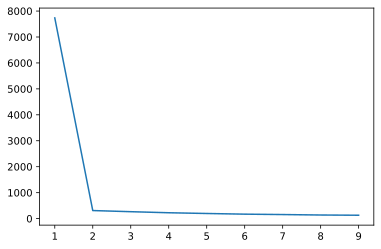

In [35]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(n_clusters, inertias);

# UMAP for MNIST dataset

In [36]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [39]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [40]:
import warnings
from umap import UMAP
import pandas as pd


def get_umap(dataset, n_components):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')

        umap = UMAP(n_components=n_components)
        embedding = umap.fit_transform(dataset)

        return pd.DataFrame(embedding, columns=[f'emb_{i+1}' for i in range(n_components)])
    

In [42]:
umap_df = get_umap(digits.data, 2)
umap_df.head()

,emb_1,emb_2
0,15.367003,4.369369
1,-6.496123,0.875842
2,-4.338641,1.424099
3,-0.215189,-3.326497
4,1.622245,11.578777


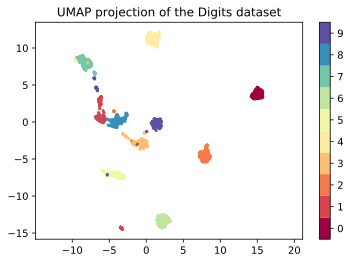

In [43]:
plt.scatter(umap_df['emb_1'], umap_df['emb_2'], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=12);

## Hyperparameters

https://umap-learn.readthedocs.io/en/latest/parameters.html

- n_neighbors: balances local versus global structure in the data. This means that low values of n_neighbors will force UMAP to concentrate on very local structure
- min_dist: controls how tightly UMAP is allowed to pack points together. It, quite literally, provides the minimum distance apart that points are allowed to be in the low dimensional representation
- n_components: the dimensionality of the reduced dimension space we will be embedding the data into
- metric: how distance is computed in the input data space

## Supervised dimension reduction

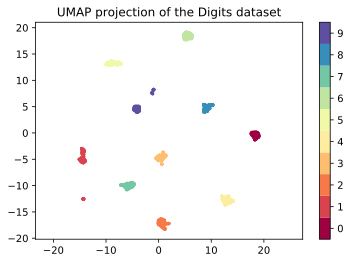

In [44]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    embedding = UMAP().fit_transform(digits.data, y=digits.target)
    umap_df = pd.DataFrame(embedding, columns=['emb_1', 'emb_2'])

plt.scatter(umap_df['emb_1'], umap_df['emb_2'], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=12);

## Semi-supervised dimension reduction

In [45]:
masked_target = digits.target.copy().astype(np.int8)
masked_target[np.random.choice(1797, size=500, replace=False)] = -1

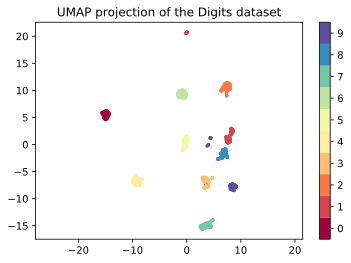

In [46]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    embedding = UMAP().fit_transform(digits.data, y=masked_target)
    umap_df = pd.DataFrame(embedding, columns=['emb_1', 'emb_2'])

plt.scatter(umap_df['emb_1'], umap_df['emb_2'], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=12);

# UMAP in moons

In [47]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, 
                   shuffle=True, 
                   noise=0.05)
X.shape

(100, 2)

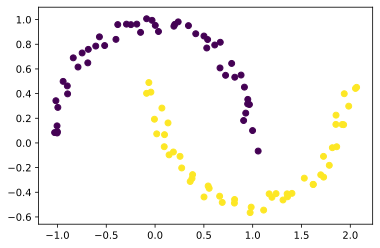

In [48]:
plt.scatter(X[:,0], X[:,1], c=y);

In [49]:
umap_df = get_umap(X, 2)
umap_df.head()

,emb_1,emb_2
0,-0.754345,2.991522
1,9.582623,-5.776315
2,2.548366,3.265280
3,5.355144,-7.266196
4,3.544764,3.418583


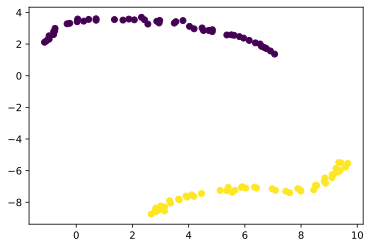

In [50]:
plt.scatter(umap_df['emb_1'], umap_df['emb_2'], c=y);

### UMAP increasing dimensionality, but maintaining clustering

In [51]:
umap_df = get_umap(X, 3)
umap_df.head()

,emb_1,emb_2,emb_3
0,-6.279140,0.507089,-2.830648
1,5.777540,0.693178,-1.597066
2,-4.134924,0.562282,-0.630311
3,5.939676,4.828459,-0.072266
4,-4.089158,0.965369,0.432528


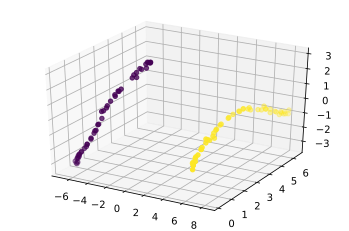

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(umap_df['emb_1'], umap_df['emb_2'], umap_df['emb_3'], c=y);

# UMAP in blobs

In [53]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=8, centers=5)

In [54]:
umap_df = get_umap(X, 2)
umap_df.head()

,emb_1,emb_2
0,-2.668978,11.794510
1,-1.967542,12.180646
2,-2.673063,12.429308
3,22.978907,23.640955
4,23.355574,24.219622


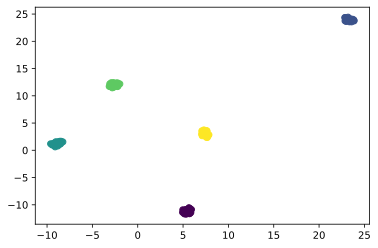

In [55]:
plt.scatter(umap_df['emb_1'], umap_df['emb_2'], c=y);

### UMAP achieving same results in 2D and 3D projections

In [56]:
umap_df = get_umap(X, 3)
umap_df.head()

,emb_1,emb_2,emb_3
0,12.586937,-7.831636,3.048564
1,12.706887,-8.406822,2.642328
2,12.799955,-7.842569,2.490996
3,3.444364,5.439844,-7.516990
4,3.396643,5.235164,-7.708089


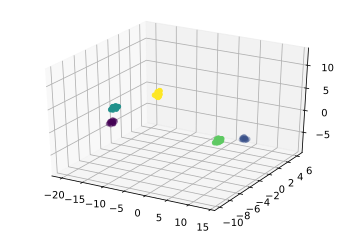

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(umap_df['emb_1'], umap_df['emb_2'], umap_df['emb_3'], c=y);

# HDBSCAN for labeling UMAP outputs

In [58]:
from hdbscan import HDBSCAN

hdbscan = HDBSCAN()

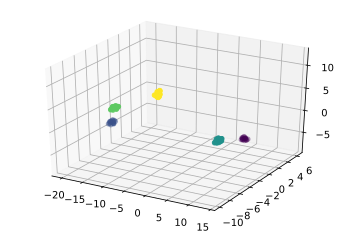

In [59]:
predictions = hdbscan.fit_predict(umap_df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(umap_df['emb_1'], umap_df['emb_2'], umap_df['emb_3'], c=predictions);

### Checking HDBSCAN clustering efficiency

In [60]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, predictions)

1.0

# UMAP - Clustering Guided Lesson

https://umap-learn.readthedocs.io/en/latest/clustering.html

# UMAP vs other techniques

https://umap-learn.readthedocs.io/en/latest/faq.html#what-is-the-difference-between-umap-vaes-pca

As a guideline for a typical pipeline: 

- high-dimensional embedding (300+) => PCA to reduce to 50 dimensions => UMAP to reduce to 10-20 dimensions => HDBSCAN for clustering / some plain algorithm for classification

https://umap-learn.readthedocs.io/en/latest/benchmarking.html